### 출처
[DS school](https://datascienceschool.net/view-notebook/8903aa20770746e78fb5b1834ab5334b/)  
[시계열 예측을 위한 Facebook Prophet](https://zzsza.github.io/data/2019/02/06/prophet/)

In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

### DS_Schol 예시

In [3]:
url = "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv"
df = pd.read_csv(url)
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [4]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



### 예측을 하려면 다음 메서드를 사용한다.

* make_future_dataframe: 예측 날짜 구간 생성
* predict: 신뢰 구간을 포함한 예측 실행

In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [6]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.185072,7.488649,8.950147,6.859746,7.527699,1.018145,1.018145,1.018145,0.048291,0.048291,0.048291,0.969855,0.969855,0.969855,0.0,0.0,0.0,8.203217
3266,2017-01-16,7.184041,7.800863,9.264204,6.857144,7.527486,1.344161,1.344161,1.344161,0.352285,0.352285,0.352285,0.991877,0.991877,0.991877,0.0,0.0,0.0,8.528203
3267,2017-01-17,7.183011,7.615279,9.046201,6.854637,7.527274,1.132590,1.132590,1.132590,0.119636,0.119636,0.119636,1.012955,1.012955,1.012955,0.0,0.0,0.0,8.315601
3268,2017-01-18,7.181980,7.454774,8.874732,6.852179,7.526953,0.966227,0.966227,0.966227,-0.066659,-0.066659,-0.066659,1.032885,1.032885,1.032885,0.0,0.0,0.0,8.148207
3269,2017-01-19,7.180949,7.435535,8.923318,6.850069,7.526626,0.979154,0.979154,0.979154,-0.072270,-0.072270,-0.072270,1.051424,1.051424,1.051424,0.0,0.0,0.0,8.160103


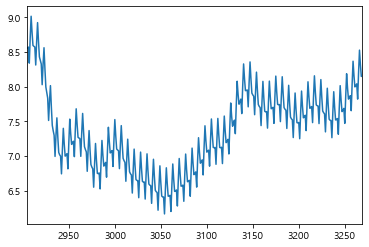

In [8]:
forecast.iloc[-365:, :].yhat.plot()

### 다음 메서드를 사용하면 시계열을 시각화할 수 있다.

* plot: 원래의 시계열 데이터와 예측 데이터
* plot_components: 선형회귀 및 계절성 성분별로 분리

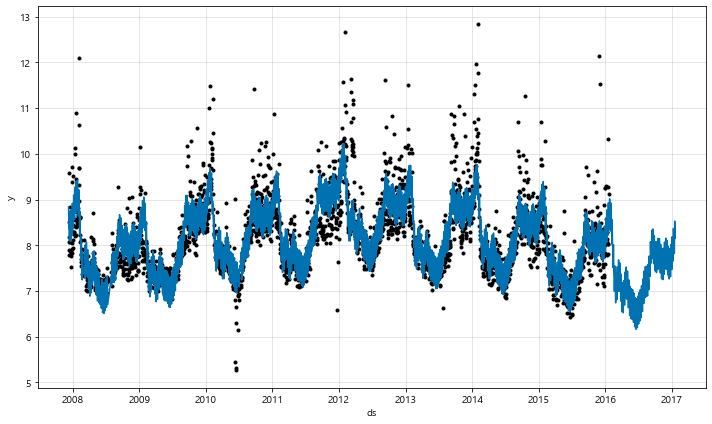

In [9]:
fig1 = m.plot(forecast, uncertainty=False)
plt.show()

### 기본 원리¶
Prophet은 다음 순서로 시계열에 대한 회귀분석 모형을 만든다.

시간 데이터의 각종 특징을 임베딩해서 계절성 추정을 한다.
나머지 데이터는 구간별 선형회귀(piecewise linear regression) 분석을 한다.
선형 회귀분석은 전체 시계열의 앞 80%부분을 25개의 구간으로 나누어 실시한다. 구간 구분점(change point)는 changepoints 속성에 있다.

In [11]:
m.changepoints

93     2008-03-17
186    2008-06-20
279    2008-10-11
372    2009-01-14
465    2009-04-17
558    2009-07-19
650    2009-10-26
743    2010-01-31
836    2010-05-06
929    2010-08-14
1022   2010-11-15
1115   2011-02-16
1208   2011-05-20
1301   2011-08-21
1394   2011-11-24
1487   2012-02-27
1580   2012-05-31
1673   2012-09-01
1765   2012-12-02
1858   2013-03-05
1951   2013-06-06
2044   2013-09-08
2137   2013-12-10
2230   2014-03-14
2323   2014-06-15
Name: ds, dtype: datetime64[ns]

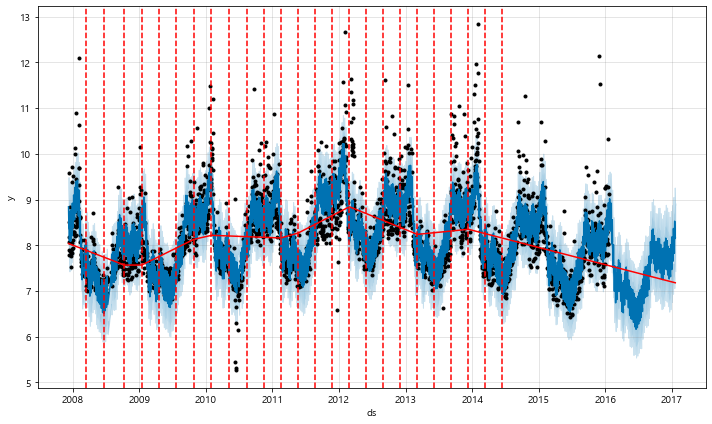

In [10]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast, threshold=0)
plt.show()

## 강성윤님

1) 데이터를 Prophet에 맞도록 가공
필요한 컬럼은 ds, y 2개!(컬럼 이름을 맞춰야함)

In [13]:
df['cap'] = 6
df['floor'] = 1.5

In [14]:
m = Prophet() # Default growth='linear'
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [15]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [16]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [17]:
future['cap'] = 6
future['floor'] = 1.5

In [19]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,5.999955,6,1.5,4.164723,9.993701,5.999955,5.999955,1.156022,1.156022,...,0.043395,0.043395,0.043395,1.112627,1.112627,1.112627,0.0,0.0,0.0,7.155977
3266,2017-01-16,5.999955,6,1.5,4.583230,10.174481,5.999955,5.999955,1.466360,1.466360,...,0.341568,0.341568,0.341568,1.124792,1.124792,1.124792,0.0,0.0,0.0,7.466315
3267,2017-01-17,5.999955,6,1.5,4.472198,10.139939,5.999955,5.999955,1.261587,1.261587,...,0.125882,0.125882,0.125882,1.135705,1.135705,1.135705,0.0,0.0,0.0,7.261542
3268,2017-01-18,5.999955,6,1.5,4.253707,9.972311,5.999955,5.999955,1.089252,1.089252,...,-0.056002,-0.056002,-0.056002,1.145254,1.145254,1.145254,0.0,0.0,0.0,7.089208
3269,2017-01-19,5.999955,6,1.5,4.454318,9.923793,5.999955,5.999955,1.071552,1.071552,...,-0.081741,-0.081741,-0.081741,1.153293,1.153293,1.153293,0.0,0.0,0.0,7.071507


In [20]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
3210,2016-11-21,6.778967,3.993844,9.465217
3211,2016-11-22,6.586205,3.831687,9.417626
3212,2016-11-23,6.426644,3.521405,9.152607
3213,2016-11-24,6.422167,3.640487,9.214649
3214,2016-11-25,6.463147,3.507904,9.483592
3215,2016-11-26,6.229078,3.368015,9.164042
3216,2016-11-27,6.600818,3.762546,9.463863
3217,2016-11-28,6.912392,4.036691,9.680479
3218,2016-11-29,6.707551,3.870223,9.386104
3219,2016-11-30,6.533870,3.740050,9.290893


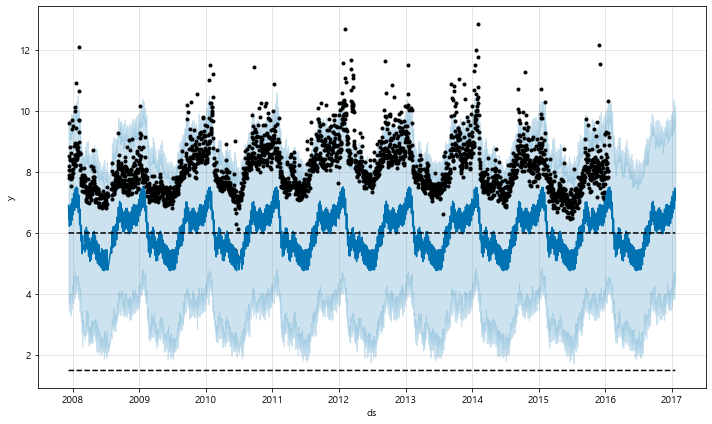

In [21]:
fig1 = m.plot(forecast)

* 점선들이 하한선과 상한선
* forecast component 시각화(Trend, Weakly, Yearly)

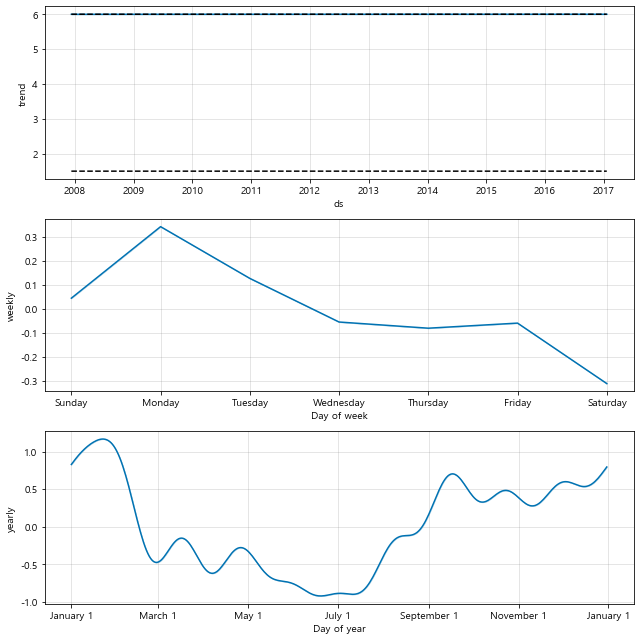

In [22]:
fig2 = m.plot_components(forecast)

### Trend Change Points
Prophet에선 기본적으로 트렌드가 변경되는 지점을 자동으로 감지해 트렌드를 예측함  
감지하는 것을 사용자가 조절할 수 있음  
Prophet 객체를 생성할 때 changepoint_range, changepoint_prior_scale, changepoints을 조절  

#### 1) changepoint_range  
기본적으로 Prophet은 시계열 데이터의 80% 크기에서 잠재적으로 ChangePoint를 지정  
90%만큼 ChangePoint로 지정하고 싶다면 아래와 같이 설정  

In [23]:
m = Prophet(changepoint_range=0.9)

#### 2) changepoint_prior_scale
Change Point의 유연성을 조정하는 방법  
오버피팅이 심하면 너무 유연한 그래프가 나와서 모든 값에 근접하고, 언더피팅일 경우 유연성이 부족  
기본 값은 0.05  
이 값을 늘리면 그래프가 유연해지고(=언더피팅 해결), 이 값을 줄이면 유연성이 감소(=오버피팅 해결)  

In [24]:
m = Prophet(changepoint_prior_scale=0.05)

#### 3) changepoints(list)
잠재적으로 change point일 수 있는 날짜들  
명시하지 않으면 잠재적인 changepoint가 자동으로 설정됨  

In [27]:
m = Prophet(changepoints=['2019-02-04', '2019-02-05'])


#### 종합적용

In [44]:
m = Prophet(changepoints=['2009-01-01', '2010-01-01'],
           changepoint_prior_scale=0.05,
           changepoint_range=0.9)

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [45]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3265,2017-01-15,7.879510,6,8.114282,9.615557,7.856695,7.912020,1.010688,1.010688,1.010688,0.048258,0.048258,0.048258,0.962431,0.962431,0.962431,0.0,0.0,0.0,8.890198
3266,2017-01-16,7.879279,6,8.445898,10.027306,7.855673,7.912332,1.339537,1.339537,1.339537,0.352334,0.352334,0.352334,0.987203,0.987203,0.987203,0.0,0.0,0.0,9.218816
3267,2017-01-17,7.879047,6,8.210854,9.789478,7.854907,7.912645,1.130023,1.130023,1.130023,0.118892,0.118892,0.118892,1.011131,1.011131,1.011131,0.0,0.0,0.0,9.009071
3268,2017-01-18,7.878816,6,8.150277,9.636975,7.854213,7.912958,0.967217,0.967217,0.967217,-0.066764,-0.066764,-0.066764,1.033981,1.033981,1.033981,0.0,0.0,0.0,8.846033
3269,2017-01-19,7.878585,6,8.073404,9.702474,7.850694,7.913271,0.983453,0.983453,0.983453,-0.072023,-0.072023,-0.072023,1.055477,1.055477,1.055477,0.0,0.0,0.0,8.862038


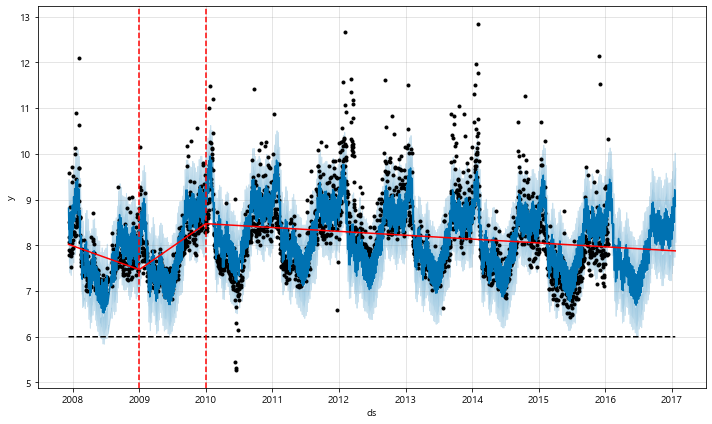

In [46]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Seasonality, Holiday Effects, And Regressors
Modeling Holidays and Special Events  
휴일이나 모델에 반영하고 싶은 이벤트가 있으면 Dataframe을 생성해 반영할 수 있음  
이벤트는 과거 데이터와 미래 데이터가 모두 포함되어 있어야 함  
주변 날짜를 포함시키기 위해 lower_window, upper_window를 사용해 업데이트의 영향을 조절 가능  
예제는 Play Off 경기일과 SUperbowl 경기날을 Holiday로 설정  
사용하는 방법은 간단, Prophet 객체를 생성할 때 holidays 인자로 넘기면 됨 

In [47]:
playoffs = pd.DataFrame({
'holiday': 'playoff',
'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                  '2010-01-24', '2010-02-07', '2011-01-08',
                  '2013-01-12', '2014-01-12', '2014-01-19',
                  '2014-02-02', '2015-01-11', '2016-01-17',
                  '2016-01-24', '2016-02-07']),
'lower_window': 0,
'upper_window': 1,
})
superbowls = pd.DataFrame({
'holiday': 'superbowl',
'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
'lower_window': 0,
'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [48]:
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


In [50]:
 m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\User\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [51]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
      ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.224102,1.197251
2191,2014-02-03,1.912033,1.459945
2532,2015-01-11,1.224102,0.000000
2533,2015-01-12,1.912033,0.000000
2901,2016-01-17,1.224102,0.000000
2902,2016-01-18,1.912033,0.000000
2908,2016-01-24,1.224102,0.000000
2909,2016-01-25,1.912033,0.000000
2922,2016-02-07,1.224102,1.197251
2923,2016-02-08,1.912033,1.459945


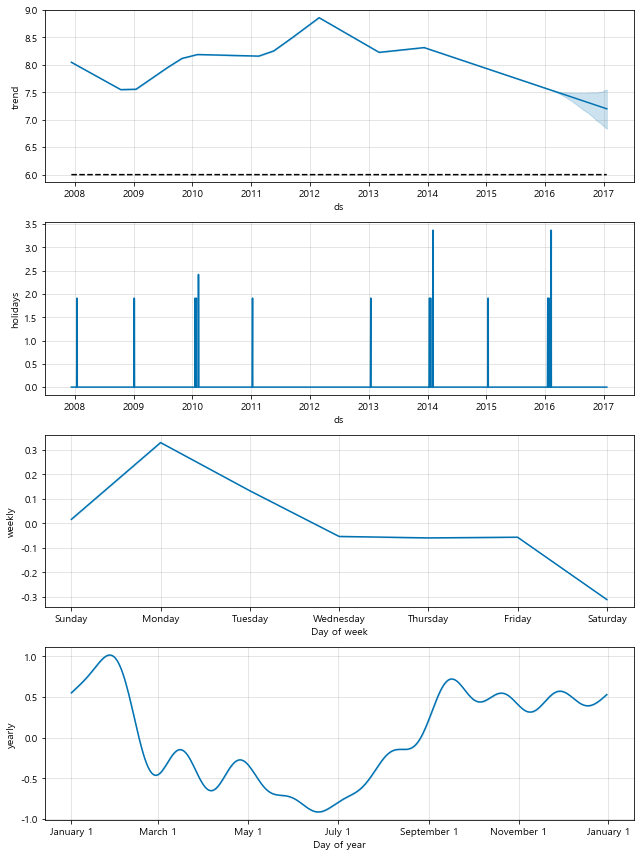

In [52]:
fig = m.plot_components(forecast)